## Homework 12: Time Series
### fahad ahmed, fs05847
#### fs05847@st.habib.edu.pk

In [357]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") #optional
plt.style.use('fivethirtyeight') #optional
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [358]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/dataSci/hw12/btc-market-price.csv', parse_dates=['Date'])
df.head()

,Date,Market_Price
0,2021-03-25,52508.23
1,2021-03-26,51415.92
2,2021-03-27,55074.47
3,2021-03-28,55863.93
4,2021-03-29,55783.71


In [359]:
df.isnull().sum()

Date            0
Market_Price    0
dtype: int64

In [360]:
df = df.set_index('Date')

In [361]:
month_data = df['Market_Price'].resample('MS').mean()

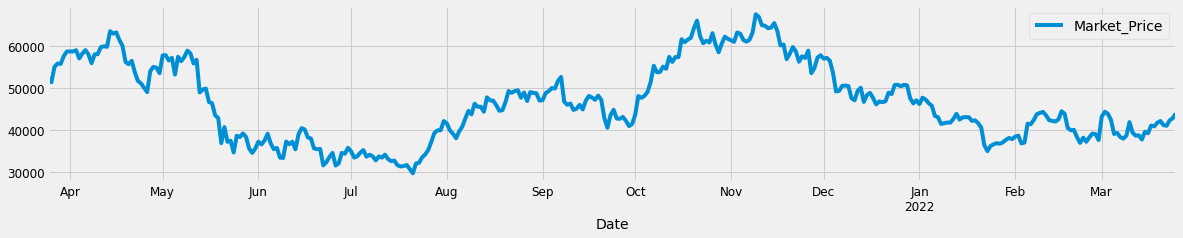

In [362]:
df.plot(figsize=(18, 3))
plt.show()

In [363]:
month_data

Date
2021-03-01    55286.294286
2021-04-01    57126.367667
2021-05-01    47107.965806
2021-06-01    35900.468667
2021-07-01    34225.643548
2021-08-01    45537.147742
2021-09-01    46045.911667
2021-10-01    57352.725161
2021-11-01    60854.589667
2021-12-01    49668.639032
2022-01-01    41355.081613
2022-02-01    40588.885000
2022-03-01    40849.896000
Freq: MS, Name: Market_Price, dtype: float64

### Q1

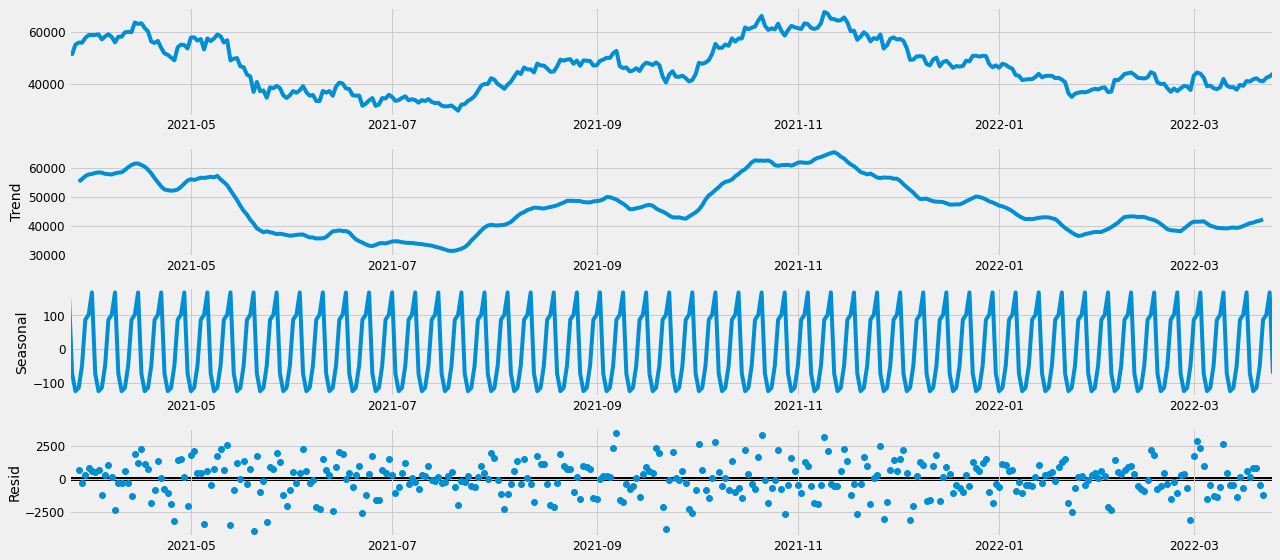

In [364]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

### As we can see the trend graph: there is any distinct tredn or pattern. the graph changes without any regular pattern.
### In the resid graph some dots are far from line so model is bad at that time while few dots are close to line so model is good at that time.
### In seasonal graph the value changes changes from -100 to +100

### Q2

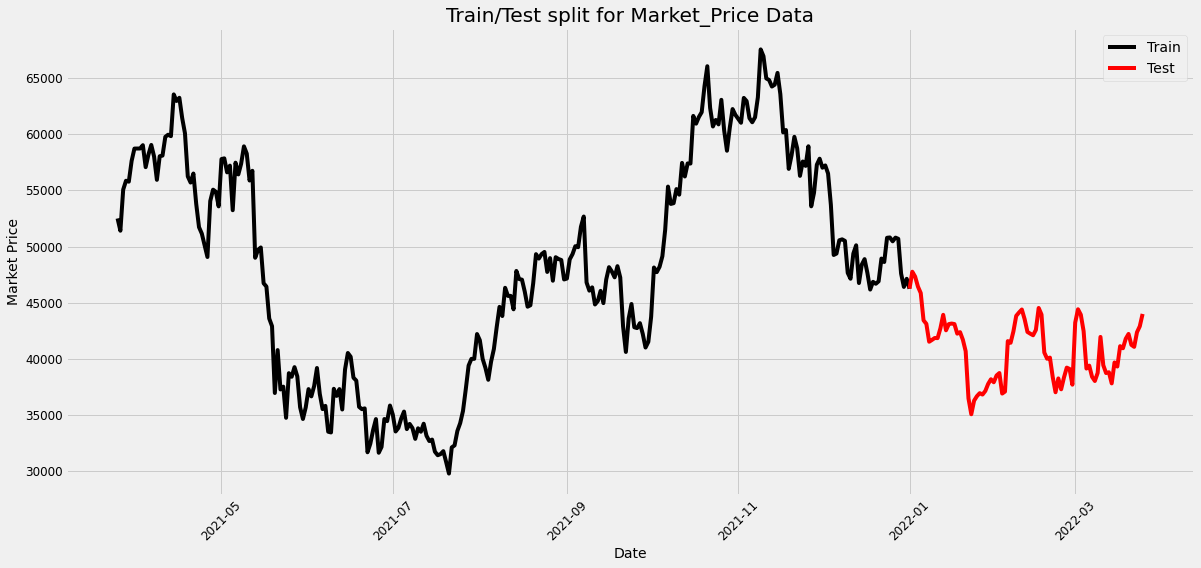

In [365]:
train = df[df.index <= pd.to_datetime("2022-01-01", format='%Y-%m-%d')]
test = df[df.index >= pd.to_datetime("2022-01-01", format='%Y-%m-%d')]

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Market_Price Data")
plt.legend()
plt.show()

### The black line showing the data used for training in the model and the red line is the data used for testing in the model

### Q3

In [366]:
from statsmodels.tsa.arima.model import ARIMA

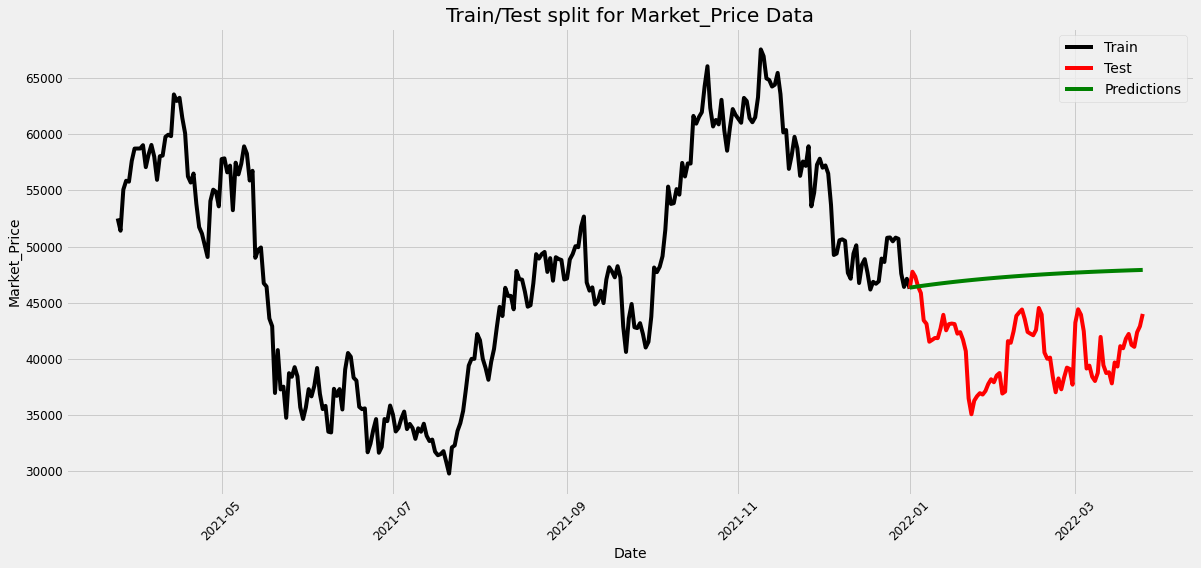

RMSE:  7045.630864336357


In [367]:
ARIMAmodel = ARIMA(train, order = (1, 0, 1))

ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index)) #only providing dates (test.index) from test as input for forecasting

y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market_Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Market_Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

### as we can see from the graph that prediction is totally different compared to real values.
### RMSE = 7045 (1,0,1) the RMSE value is very high so parameters in ARIMA are not optimal

### Q4

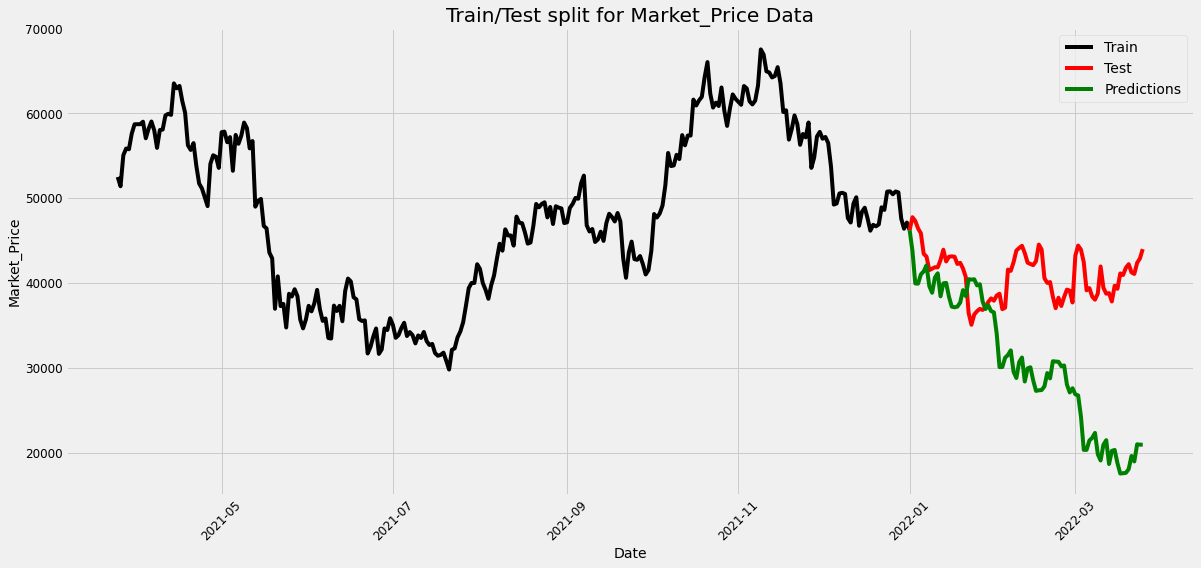

RMSE:  13149.679541846579


In [368]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train,order=(1, 1, 1),seasonal_order=(1, 1, 0, 30))
# because we using days so 30
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market_Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Market_Price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

there is change and fluctuation in the prediction but results are still away from test values. The RMSE value is 13149 which is very high because of not optimal parameters in SARIMAX.

## Q5

In [369]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]

In [370]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 30)12 - AIC:6896.675317036195
ARIMA(0, 0, 0)x(0, 0, 1, 30)12 - AIC:5996.136641663147
ARIMA(0, 0, 0)x(0, 1, 0, 30)12 - AIC:5392.439338345183
ARIMA(0, 0, 0)x(0, 1, 1, 30)12 - AIC:4754.247972901741
ARIMA(0, 0, 0)x(1, 0, 0, 30)12 - AIC:5401.778120422718
ARIMA(0, 0, 0)x(1, 0, 1, 30)12 - AIC:5373.825109576674
ARIMA(0, 0, 0)x(1, 1, 0, 30)12 - AIC:4778.387179456952
ARIMA(0, 0, 0)x(1, 1, 1, 30)12 - AIC:4749.759034773311
ARIMA(0, 0, 1)x(0, 0, 0, 30)12 - AIC:6669.573841282503
ARIMA(0, 0, 1)x(0, 0, 1, 30)12 - AIC:5917.206678747218
ARIMA(0, 0, 1)x(0, 1, 0, 30)12 - AIC:5213.824018162752
ARIMA(0, 0, 1)x(0, 1, 1, 30)12 - AIC:4567.6874951034715
ARIMA(0, 0, 1)x(1, 0, 0, 30)12 - AIC:5942.578705465969
ARIMA(0, 0, 1)x(1, 0, 1, 30)12 - AIC:5897.3073439158725
ARIMA(0, 0, 1)x(1, 1, 0, 30)12 - AIC:4628.247779162037
ARIMA(0, 0, 1)x(1, 1, 1, 30)12 - AIC:4587.558341555437
ARIMA(0, 1, 0)x(0, 0, 0, 30)12 - AIC:5032.643611008863
ARIMA(0, 1, 0)x(0, 0, 1, 30)12 - AIC:4502.897994082363
ARIMA(0,

### the loswest AIC is 3996 (the last value in above answer) with optimal parameters: (1,1,1) (1,1,1,30)

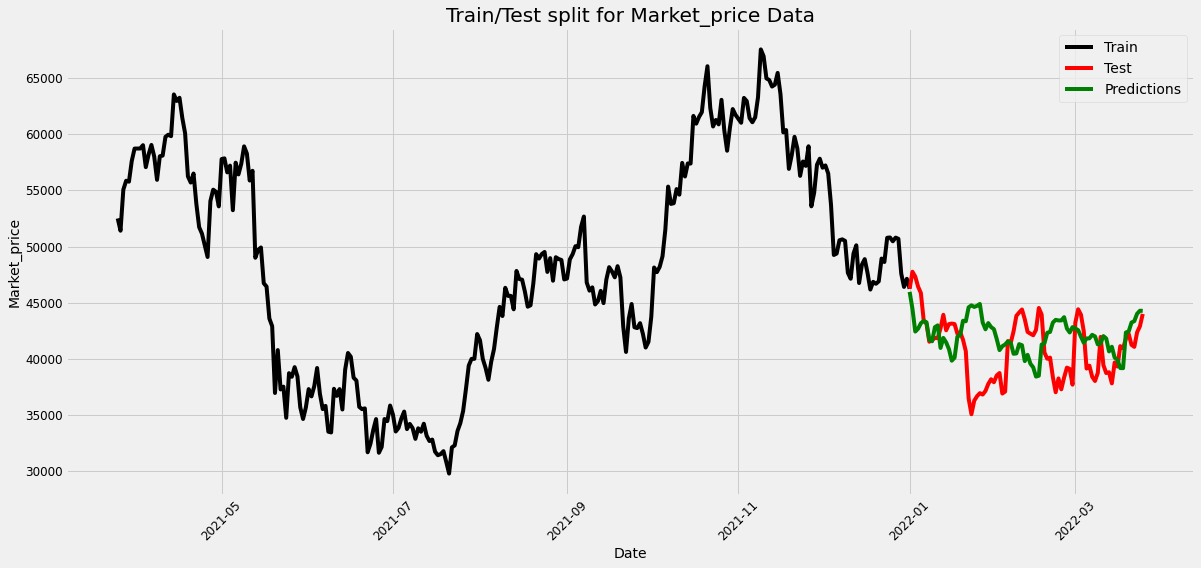

RMSE:  3635.5458738220914


In [376]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train,order=(1, 1, 1),seasonal_order=(1, 1, 1, 30))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Market_price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Market_price Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

### As we can see from the graph the prediction is much accurate now and closer to real values.
### we have chosen the optimal parameters: order=(1, 1, 1),seasonal_order=(1, 1, 1,30)
### And the RMSE value (3635) has decreased
## SO SARIMAX is better than ARIMAX

### Q6

## ML tech 1

In [372]:
import numpy as np
 
# extract the seasonality data
months = [x.month for x in train.index]
years = [x.year for x in train.index]
day = [x.day for x in train.index]
 
# convert into one matrix
X = np.array([day, months, years]).T
Y = train.values

# extract the day, month and year data
tmonths = [x.month for x in test.index]
tyears = [x.year for x in test.index]
tday = [x.day for x in test.index]
 
# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = test.values

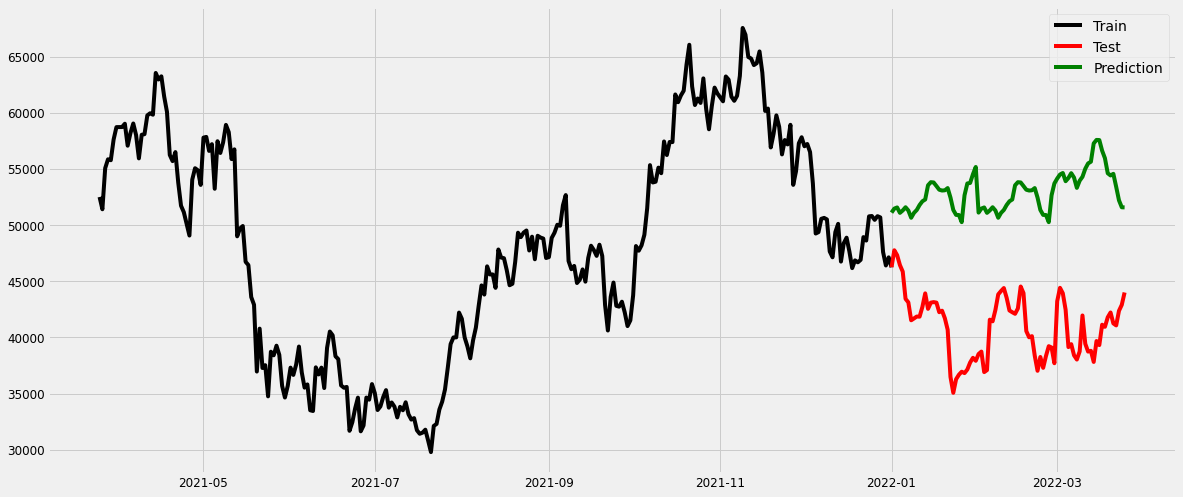

RMSE:  12467.568085531188


In [377]:
from sklearn.ensemble import RandomForestRegressor
 
# fit the model
rfmodel = RandomForestRegressor(random_state=10)
rfmodel.fit(X,Y)
 
# predict on the same period
preds = rfmodel.predict(testX)
 
# plot what has been learned
plt.plot(train.index, train.values,color="black", label='Train')
plt.plot(test.index, test.values,color="red", label='Test')
plt.plot(test.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()
rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ",rf_rmse)

## the prediction is very away from real values and the RMSE value is also very high 
RMSE = 1267

## ML Tech 2

In [379]:
from sklearn.linear_model import LinearRegression

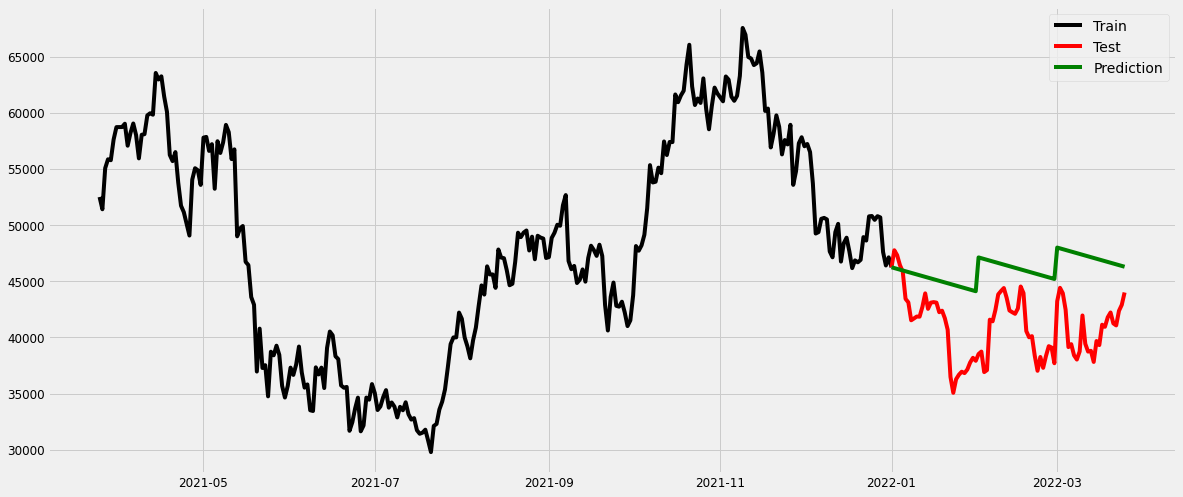

RMSE:  5837.061014311136


In [380]:
rfmodel = LinearRegression()
rfmodel.fit(X, Y)


preds = rfmodel.predict(testX)
plt.plot(train.index, train.values, color="black", label='Train')
plt.plot(test.index, test.values, color="red", label='Test')
plt.plot(test.index, preds, color="green", label='Prediction')
plt.legend()
plt.show()
rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ", rf_rmse)


### Q7

### If compare the all techniques/models the SARIMAX gave us the most accurate or prediction most closer to real values (seen in the graph above) compared to other 3 techniques and the RMSE value given by SARIMAX with optimal parameters is the lowest (3635) compared to all other RMSE values.

### Q8

In [381]:
dates = pd.date_range(start='01/04/2022', end='30/06/2022')

In [382]:
t_months = [x.month for x in dates]
t_years = [x.year for x in dates]
t_day = [x.day for x in dates]

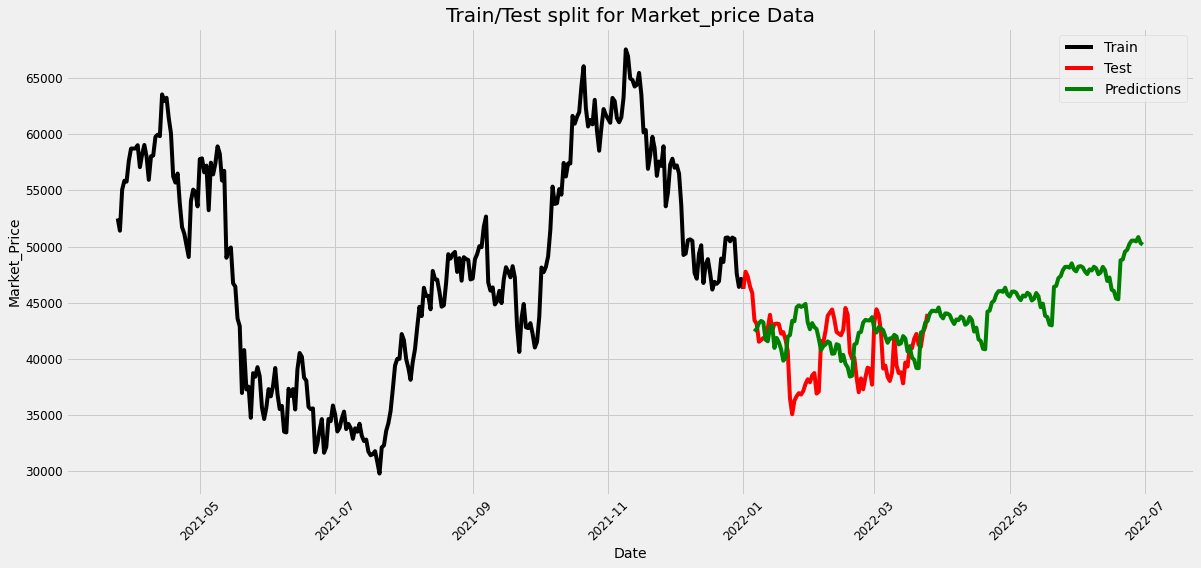

In [383]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
SARIMAXmodel = SARIMAXmodel.fit(disp=0)

y_pred = SARIMAXmodel.get_forecast(len(dates))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start=dates[0],
                                                end=dates[-1])
y_pred_df.index = dates
y_pred_out = y_pred_df["Predictions"]

plt.plot(train, color="black", label='Train')
plt.plot(test, color="red", label='Test')
plt.ylabel('Market_Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Market_price Data")

plt.plot(y_pred_out, color='green', label='Predictions')
plt.legend()
plt.show()

### Q9

### ML random Forest technique

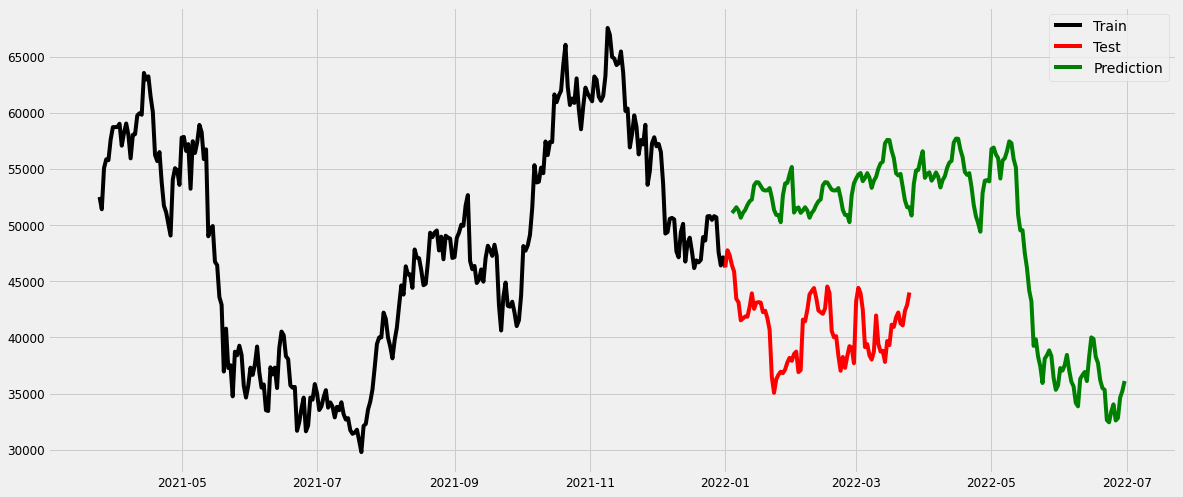

In [385]:
# convert into one matrix
testX = np.array([t_day, t_months, t_years]).T

# fit the model
rfmodel = RandomForestRegressor(random_state=10)
rfmodel.fit(X, Y)

preds = rfmodel.predict(test_X)

plt.plot(train.index, train.values, color="black", label='Train')
plt.plot(test.index, test.values, color="red", label='Test')
plt.plot(dates, preds, color="green", label='Prediction')
plt.legend()
plt.show()

## The SARIMAX gicws the better prediction. 
random forest gives the fluctuation in the values but very away from real values.